In [1]:
# Link Trabalho Final : https://www.dropbox.com/s/3fla2xuc8t9xba2/Deep%20Learning%20-%20Lista%20de%20Exerc%C3%ADcios%20v1.4.pdf?dl=0

In [2]:
# Importando as bibliotecas
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf
from keras.callbacks import ModelCheckpoint   

In [3]:
# Verificando se o df existe

# from google.colab import drive
# drive.mount('/content/drive')
#!ls -larth '/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/heart.csv'
file_path_train = 'D:\__Projetos_\_MBA\DeepLearning\deep_learning_final_17ia\dados\pulsar_data_train.csv'
file_path_test = 'D:\__Projetos_\_MBA\DeepLearning\deep_learning_final_17ia\dados\pulsar_data_train.csv'

if os.path.exists(file_path_train) :
    print("Arquivo Existe Train")
if os.path.exists(file_path_test) :
    print("Arquivo Existe Test")

Arquivo Existe Train
Arquivo Existe Test


In [4]:
# !ls -larth '/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/'

In [5]:
# Importando dados

import pandas as pd
pulsar_train = pd.read_csv(file_path_train)
pulsar_test = pd.read_csv(file_path_test)

In [6]:
print("Train shape:",pulsar_train.shape)
print("Test shape:",pulsar_test.shape)

Train shape: (12528, 9)
Test shape: (12528, 9)


In [7]:
pulsar_train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

<AxesSubplot:>

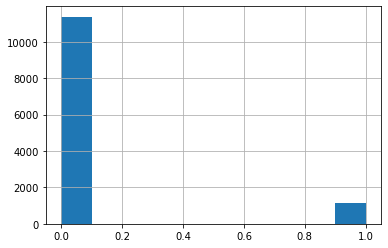

In [8]:
pulsar_train.target_class.hist(figsize=(6,4))

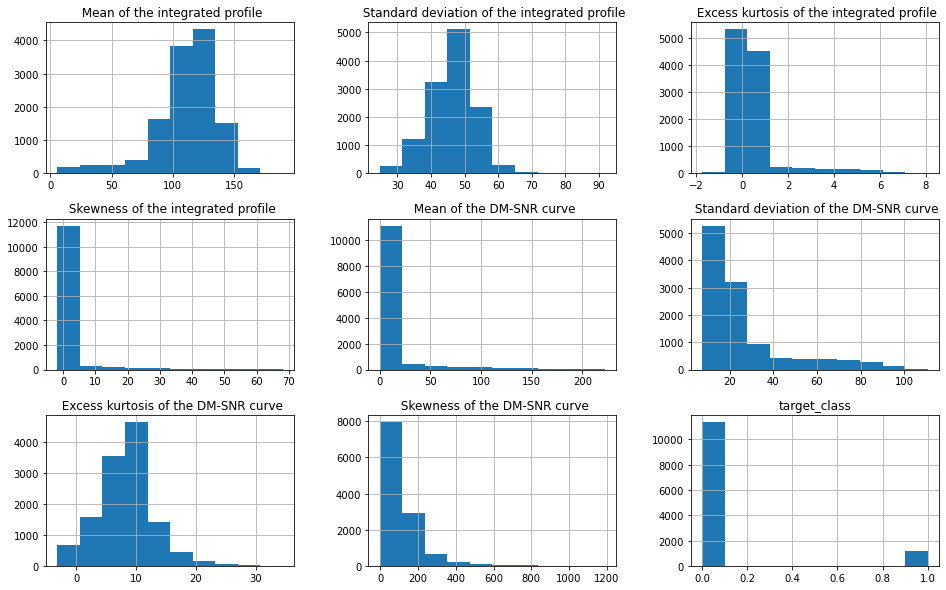

In [9]:
hist = pulsar_train.hist(bins=10, figsize=(16,10))

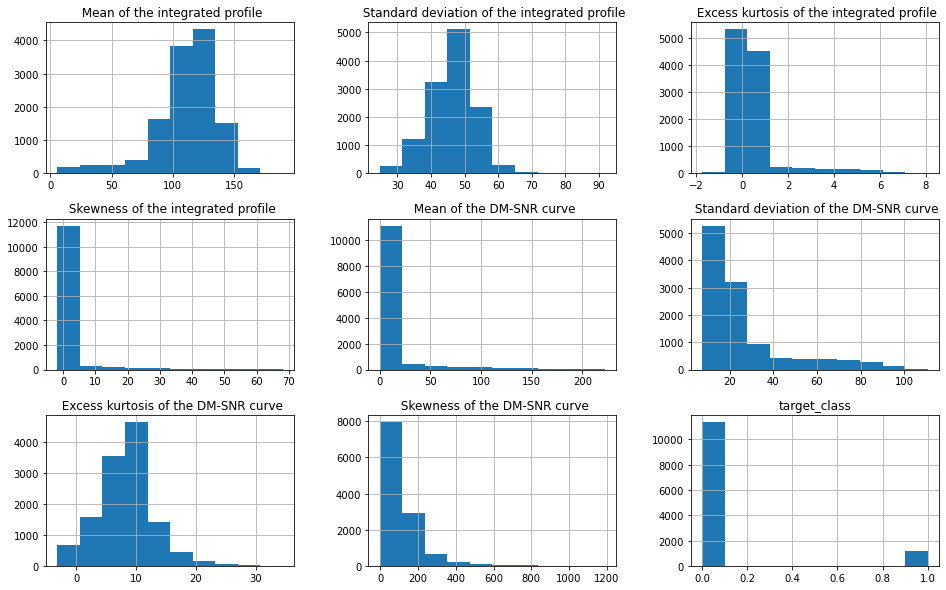

In [10]:
hist = pulsar_test.hist(bins=10, figsize=(16,10))

In [11]:
# Separando dados em X e Y
X= pulsar_train.drop('target_class',axis=1).to_numpy()
Y= pulsar_train['target_class'].to_numpy()
print(X.shape, Y.shape, pulsar_train.columns)

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train, y_valid = train_test_split(X,Y,test_size = 0.3 , random_state = 0 )

X_test= pulsar_test.drop('target_class',axis=1).to_numpy()
y_test= pulsar_test['target_class'].to_numpy()

(12528, 8) (12528,) Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [13]:
modelo = Sequential()

modelo.add(Dense(10,input_shape=(8,),activation='relu'))
modelo.add(Dense(8,activation='relu'))
modelo.add(Dropout(0.2))
# modelo.add(Dense(6,activation='relu'))
# modelo.add(Dropout(0.2))
modelo.add(Dense(3,activation='softmax'))
modelo.add(Dropout(0.2))

modelo.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'SGD' , metrics = ['accuracy'] )

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
_________________________________________________________________
dropout_2 (Dropout)          (None, 3)                 0

In [14]:
print("Shape X_train:",X_train.shape)
print("Shape X_test:",X_test.shape)
print("Shape X_valid:",X_valid.shape)
print("Shape y_train:",y_train.shape)
print("Shape y_test:",y_test.shape)
print("Shape y_valid:",y_valid.shape)
type(X_train)

Shape X_train: (8769, 8)
Shape X_test: (12528, 8)
Shape X_valid: (3759, 8)
Shape y_train: (8769,)
Shape y_test: (12528,)
Shape y_valid: (3759,)


numpy.ndarray

In [15]:
# Criando modelo com checkpoint automático

checkpointer = ModelCheckpoint(filepath='checkpoint_3-3.hdf', verbose=1,  save_best_only=True, monitor='val_accuracy')
# checkpointer = ModelCheckpoint(filepath='teste.hdf', verbose=1,  save_best_only=True, monitor='val_accuracy')

hist = modelo.fit(X_train, y_train, batch_size=15, epochs=50, validation_data=(X_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/50
557/585 [===========================>..] - ETA: 0s - loss: nan - accuracy: 0.9083
Epoch 00001: val_accuracy improved from -inf to 0.90769, saving model to teste.hdf
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: teste.hdf\assets
585/585 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.9077 - val_loss: nan - val_accuracy: 0.9077
Epoch 2/50
585/585 [==============================] - ETA: 0s - loss: nan - accuracy: 0.9081
Epoch 00002: val_accuracy did not improve from 0.90769
585/585 [==============================] - 0s 592us/step - loss: nan - accuracy: 0.9081 - val_loss: nan - val_accuracy: 0.9077
Epoch 3/50
571/585 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.9074
Epoch 00003: val_accuracy did not improve fro

In [16]:
# modelo.fit(X_train , y_train ,validation_split=0.3,epochs = 100)

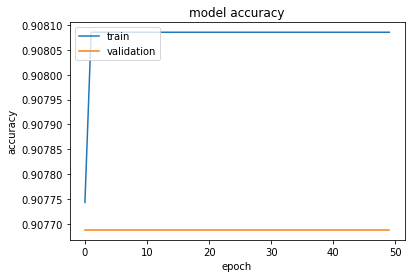

In [17]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
scores = modelo.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

392/392 [==============================] - 0s 583us/step - loss: nan - accuracy: 0.9080

accuracy: 90.80%


In [19]:
scores = modelo.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

275/275 [==============================] - 0s 588us/step - loss: nan - accuracy: 0.9081

accuracy: 90.81%


In [20]:
scores = modelo.evaluate(X_valid, y_valid)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

118/118 [==============================] - 0s 406us/step - loss: nan - accuracy: 0.9077

accuracy: 90.77%
